# 2 Dimensional Histograms

Download data frame that has FDR corrected pvalues for all trans proteins. (See notebook EGFR_Fig_1C_data_munging in this folder) Next, calculate the total number of p values significant for each trans protein. Then calculate the mean and standard deviation of pvalues/ Pearson correlations across a trans gene. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
import statsmodels.stats.multitest

import cptac

/Users/Lindsey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_fdr_pvals = pd.read_csv("Pval_corr_table_Fig_1C.csv")
df_fdr_pvals = df_fdr_pvals.drop(['Unnamed: 0'], axis=1)
df_fdr_pvals = df_fdr_pvals.set_index("Comparison")
df_fdr_pvals = df_fdr_pvals[1:] #Drop EGFR 
df_fdr_pvals

,Correlation_Gbm,P_value_Gbm,Correlation_kidney,P_value_kidney,Correlation_Ovar,P_value_Ovar,Correlation_Brca,P_value_Brca,Correlation_Luad,P_value_Luad,Correlation_Hnscc,P_value_Hnscc,Correlation_Colon,P_value_Colon,Correlation_Lscc,P_value_Lscc
Comparison,,,,,,,,,,,,,,,,
PHLDA1_proteomics,0.816848,3.507071e-21,0.254436,0.060261,NaN,NaN,0.364797,0.002164,0.260110,0.074530,0.664271,8.888640e-12,0.386104,0.122847,0.713420,2.644826e-14
GRB2_proteomics,-0.610889,6.729990e-08,-0.217427,0.120342,-0.190090,0.346111,-0.177379,0.142733,-0.302439,0.020631,-0.532341,3.320092e-06,0.150960,0.347409,-0.198042,2.437176e-01
SOCS2_proteomics,0.562720,3.420388e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020297,9.557300e-01,NaN,NaN,0.472624,1.417921e-02
CDH4_proteomics,0.559180,3.420388e-06,0.148407,0.513490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAB2_proteomics,-0.556402,3.420388e-06,-0.076173,0.673774,0.076981,0.750510,0.326055,0.003543,-0.086403,0.597546,-0.208437,1.490980e-01,-0.147519,0.360266,-0.072496,7.501117e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF283_proteomics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002610,9.941900e-01
TRIM39_proteomics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002379,9.945224e-01
ADGRA3_proteomics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002228,9.958381e-01


In [3]:
def Pvalue_sig(row):
    numSig = 0

    for item in row:
        if pd.isnull(item):
            continue
        if item < 0.05:
            numSig += 1
            
    return numSig

In [4]:
#Only include genes that have data for at least 6/8 genes.
df_fdr_pvals = df_fdr_pvals.dropna(thresh=12, axis=0)
df_fdr_pvals

,Correlation_Gbm,P_value_Gbm,Correlation_kidney,P_value_kidney,Correlation_Ovar,P_value_Ovar,Correlation_Brca,P_value_Brca,Correlation_Luad,P_value_Luad,Correlation_Hnscc,P_value_Hnscc,Correlation_Colon,P_value_Colon,Correlation_Lscc,P_value_Lscc
Comparison,,,,,,,,,,,,,,,,
PHLDA1_proteomics,0.816848,3.507071e-21,0.254436,0.060261,NaN,NaN,0.364797,0.002164,0.260110,0.074530,0.664271,8.888640e-12,0.386104,0.122847,0.713420,2.644826e-14
GRB2_proteomics,-0.610889,6.729990e-08,-0.217427,0.120342,-0.190090,0.346111,-0.177379,0.142733,-0.302439,0.020631,-0.532341,3.320092e-06,0.150960,0.347409,-0.198042,2.437176e-01
DAB2_proteomics,-0.556402,3.420388e-06,-0.076173,0.673774,0.076981,0.750510,0.326055,0.003543,-0.086403,0.597546,-0.208437,1.490980e-01,-0.147519,0.360266,-0.072496,7.501117e-01
PLA2G15_proteomics,-0.556624,3.420388e-06,-0.298029,0.022160,-0.035395,0.899379,0.274185,0.016061,-0.182930,0.199987,-0.089313,6.107771e-01,NaN,NaN,-0.147438,4.276969e-01
GLA_proteomics,-0.550491,4.776521e-06,-0.298348,0.021948,0.022300,0.938939,0.069504,0.615277,0.163722,0.261873,-0.019486,9.315413e-01,0.057118,0.760673,-0.033880,8.999057e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRRC15_proteomics,NaN,NaN,NaN,NaN,-0.029968,0.914496,0.217923,0.064089,0.198579,0.158087,0.172882,2.503881e-01,-0.167281,0.452595,-0.058908,8.041667e-01
COL21A1_proteomics,NaN,NaN,NaN,NaN,0.018397,0.954930,0.200425,0.360198,0.256750,0.054432,-0.153833,5.877925e-01,0.115689,0.508694,0.066330,7.826777e-01
SERPINB5_proteomics,NaN,NaN,NaN,NaN,0.017519,0.954992,0.502401,0.000001,-0.287737,0.028235,0.271104,4.480170e-02,0.117366,0.483110,0.379911,4.287176e-03


In [5]:
df_fdr_pvals["Num_sig"] = df_fdr_pvals.loc[:,["P_value_Gbm","P_value_kidney","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_Hnscc","P_value_Lscc","P_value_Colon"]].apply(Pvalue_sig, axis = 1)
df_fdr_pvals = df_fdr_pvals.sort_values(by=['Num_sig'],ascending=False)


/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
#Calculate mean and standard deviation for pvalues and Pearson Correlations
df_fdr_pvals["Standard_Deviation_P_value"] = df_fdr_pvals.loc[:,["P_value_Gbm","P_value_kidney","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_Hnscc","P_value_Lscc","P_value_Colon"]].std(axis = 1)
df_fdr_pvals["Mean_P_value"] = df_fdr_pvals.loc[:,["P_value_Gbm","P_value_kidney","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_Hnscc","P_value_Lscc","P_value_Colon"]].mean(axis = 1)
df_fdr_pvals["Standard_Deviation_Correlation"] = (df_fdr_pvals.loc[:,["Correlation_Gbm","Correlation_kidney","Correlation_Ovar","Correlation_Brca","Correlation_Luad","Correlation_Hnscc","Correlation_Lscc","Correlation_Colon"]].std(axis = 1))
df_fdr_pvals["Mean_Correlation"] = (df_fdr_pvals.loc[:,["Correlation_Gbm","Correlation_kidney","Correlation_Ovar","Correlation_Brca","Correlation_Luad","Correlation_Hnscc","Correlation_Lscc","Correlation_Colon"]].mean(axis = 1))



In [7]:
#Keep trans genes that are significant in atleast 1 gene. 

df_fdr_pvals_1 = df_fdr_pvals[df_fdr_pvals['Num_sig'].isin([1,2,3,4,5,6,7])]


# Step 2: Plot 2D Histogram

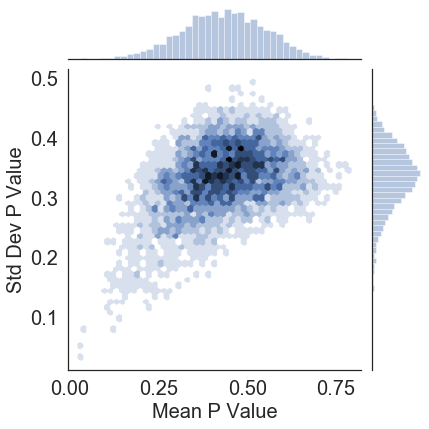

In [8]:

sns.set(rc={'xtick.labelsize':20,
            'ytick.labelsize':20}, style = "white")
g = (sns.jointplot("Mean_P_value","Standard_Deviation_P_value",data = df_fdr_pvals_1, kind="hex", bins = 10)
        .set_axis_labels("Mean P Value", "Std Dev P Value", fontsize=20))

plt.show()
g.savefig("EGFR_Fig_1C_Pvalue_sig_atleast1_cancer.png", dpi = 300)

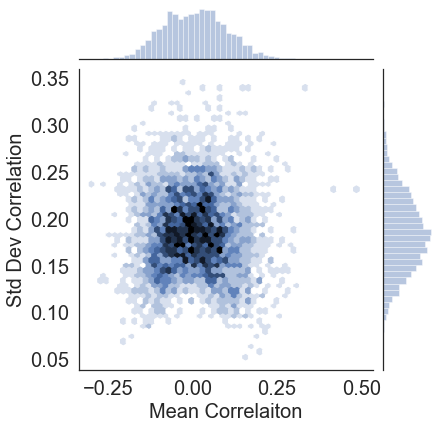

In [9]:
sns.set(rc={'xtick.labelsize':20,
            'ytick.labelsize':20}, style = "white")

g = (sns.jointplot("Mean_Correlation","Standard_Deviation_Correlation",data = df_fdr_pvals_1, kind="hex", bins = 10)
        .set_axis_labels("Mean Correlaiton", "Std Dev Correlation", fontsize=20))


g.savefig("EGFR_Fig_1C_Corr_atleast1_cancer.png", dpi = 300)
plt.show()

# Filter for genes significant in at least 2 Cancers 

In [10]:

df_fdr_pvals_2 = df_fdr_pvals[df_fdr_pvals['Num_sig'].isin([2,3,4,5,6,7,8])]

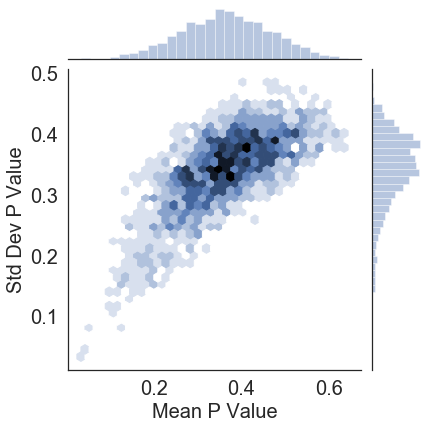

In [11]:

sns.set(rc={'xtick.labelsize':20,
            'ytick.labelsize':20}, style = "white")
g = (sns.jointplot("Mean_P_value","Standard_Deviation_P_value",data = df_fdr_pvals_2, kind="hex", bins = 10)
        .set_axis_labels("Mean P Value", "Std Dev P Value", fontsize=20))

plt.show()
g.savefig("EGFR_Fig_1C_Pvalue_atleast2_cancers.png", dpi = 300)

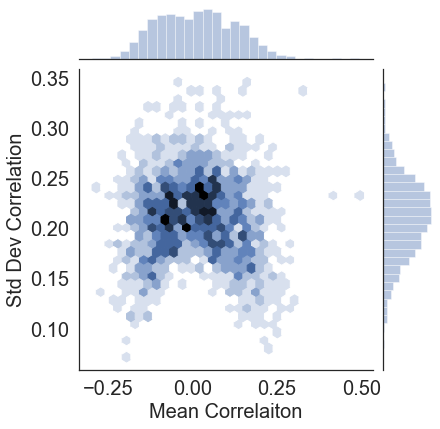

In [12]:
sns.set(rc={'xtick.labelsize':20,
            'ytick.labelsize':20}, style = "white")

g = (sns.jointplot("Mean_Correlation","Standard_Deviation_Correlation",data = df_fdr_pvals_2, kind="hex", bins = 10)
        .set_axis_labels("Mean Correlaiton", "Std Dev Correlation", fontsize=20))


g.savefig("EGFR_Fig_1C_Corr_atleast2_cancers.png", dpi = 300)
plt.show()

# At least 3 Cancers

In [13]:

df_fdr_pvals_3 = df_fdr_pvals[df_fdr_pvals['Num_sig'].isin([3,4,5,6,7,8])]

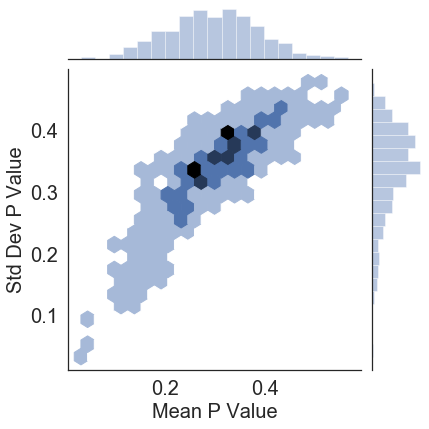

In [14]:

sns.set(rc={'xtick.labelsize':20,
            'ytick.labelsize':20}, style = "white")
g = (sns.jointplot("Mean_P_value","Standard_Deviation_P_value",data = df_fdr_pvals_3, kind="hex", bins = 5)
        .set_axis_labels("Mean P Value", "Std Dev P Value", fontsize=20))

plt.show()
g.savefig("EGFR_Fig_1C_Pvalue_EGFR_atleast3_cancers.png", dpi = 300)

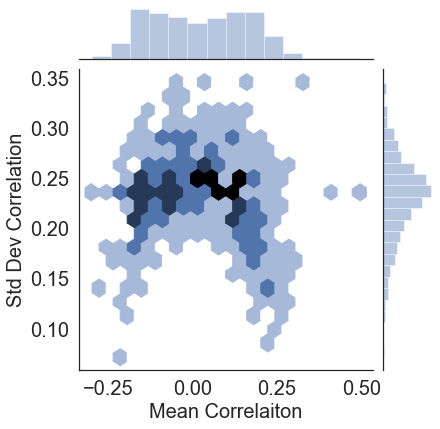

In [15]:
sns.set(rc={'xtick.labelsize':20,
            'ytick.labelsize':20}, style = "white")

g = (sns.jointplot("Mean_Correlation","Standard_Deviation_Correlation",data = df_fdr_pvals_3, kind="hex", bins = 5)
        .set_axis_labels("Mean Correlaiton", "Std Dev Correlation", fontsize=20))


g.savefig("EGFR_Fig_1C_Corr_EGFR_atleast3_cancers.png", dpi = 300)
plt.show()

# Single Gene Example PLAU

In [16]:
df_fdr_pvals["Num_sig"] = df_fdr_pvals.loc[:,["P_value_Gbm","P_value_kidney","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_Hnscc","P_value_Lscc","P_value_Colon"]].apply(Pvalue_sig, axis = 1)
df_fdr_pvals = df_fdr_pvals.sort_values(by=['Num_sig'],ascending=False)

In [17]:

df_fdr_pvals_1 = df_fdr_pvals[df_fdr_pvals['Num_sig'].isin([1,2,3,4,5,6,7,8])]
df_fdr_pvals_1

,Correlation_Gbm,P_value_Gbm,Correlation_kidney,P_value_kidney,Correlation_Ovar,P_value_Ovar,Correlation_Brca,P_value_Brca,Correlation_Luad,P_value_Luad,...,P_value_Hnscc,Correlation_Colon,P_value_Colon,Correlation_Lscc,P_value_Lscc,Num_sig,Standard_Deviation_P_value,Mean_P_value,Standard_Deviation_Correlation,Mean_Correlation
Comparison,,,,,,,,,,,,,,,,,,,,,
LANCL2_proteomics,0.478723,0.000091,0.188217,0.193598,0.110983,0.627956,0.300981,7.599309e-03,0.588808,4.733914e-08,...,1.970503e-21,0.320786,0.026823,0.575817,2.040789e-07,6,0.220706,0.107008,0.230333,0.420130
KIF13B_proteomics,-0.143903,0.357780,-0.310972,0.016103,0.439778,0.009101,-0.312353,5.460232e-03,-0.272975,3.960258e-02,...,2.212241e-04,0.019902,0.918920,-0.363670,6.920009e-03,6,0.326279,0.169263,0.285396,-0.173143
MYO10_proteomics,0.447478,0.000289,-0.263921,0.049045,0.374118,0.035041,0.515801,5.191477e-07,0.230896,8.949836e-02,...,2.728434e-03,NaN,NaN,0.292466,4.901629e-02,6,0.033619,0.032231,0.257917,0.281063
CNNM4_proteomics,-0.372324,0.003168,0.069926,0.718877,0.076606,0.751602,-0.260055,2.329196e-02,0.270616,4.101591e-02,...,3.293176e-02,0.352937,0.013936,0.311652,3.142153e-02,6,0.329428,0.202031,0.273997,0.091721
CD109_proteomics,-0.361839,0.004379,0.268902,0.044632,0.015377,0.961793,0.265349,2.042875e-02,0.113339,4.717738e-01,...,8.765469e-06,0.297635,0.042193,0.360461,7.836561e-03,6,0.348547,0.194131,0.266765,0.184153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IMPAD1_proteomics,0.027901,0.892102,-0.099595,0.558318,0.130791,0.551631,0.079063,5.611328e-01,0.266553,4.487140e-02,...,4.565814e-01,0.264705,0.073118,0.194429,2.555037e-01,1,0.284997,0.424157,0.123276,0.123055
MT2A_proteomics,-0.079066,0.648502,0.092954,0.592811,-0.002157,0.996598,0.241590,3.713961e-02,0.086568,5.969828e-01,...,2.795638e-01,NaN,NaN,0.109200,5.980265e-01,1,0.302826,0.535660,0.104910,0.087731
C11orf58_proteomics,0.079300,0.647733,-0.056691,0.769348,-0.079377,0.740791,-0.309913,5.878587e-03,0.083700,6.109855e-01,...,8.100384e-01,0.049011,0.798650,-0.060608,7.986502e-01,1,0.269569,0.647759,0.130770,-0.030765


In manuscript, a single gene (PLAU) from the histogram figure is mentioned. Here are the correlations and pvalues as well as the average and std dev for the p values and correlations.

In [18]:
rowData = df_fdr_pvals_1.loc[ 'PLAU_proteomics' , : ]
rowData

Correlation_Gbm                  -0.278913
P_value_Gbm                       0.039473
Correlation_kidney               -0.041226
P_value_kidney                    0.893600
Correlation_Ovar                  0.003476
P_value_Ovar                      0.991874
Correlation_Brca                  0.369332
P_value_Brca                      0.000802
Correlation_Luad                  0.181156
P_value_Luad                      0.205032
Correlation_Hnscc                 0.451865
P_value_Hnscc                     0.000148
Correlation_Colon                 0.233998
P_value_Colon                     0.190092
Correlation_Lscc                  0.412139
P_value_Lscc                      0.001281
Num_sig                           4.000000
Standard_Deviation_P_value        0.411952
Mean_P_value                      0.290288
Standard_Deviation_Correlation    0.255176
Mean_Correlation                  0.166478
Name: PLAU_proteomics, dtype: float64